In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# IMPORT LIBRARY

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/KINGCAHYADI/DATA-MINING/refs/heads/main/breast-cancer.csv')
df.head()

# MENAMPILKAN 5 TERATAS DI DATA SET

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.info()
# UNTUNG MELIHAT KESELURUHAN DATA DAN TIPE NYA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.describe()

# MENAMPILKAN DATA YANG NUMERIC

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


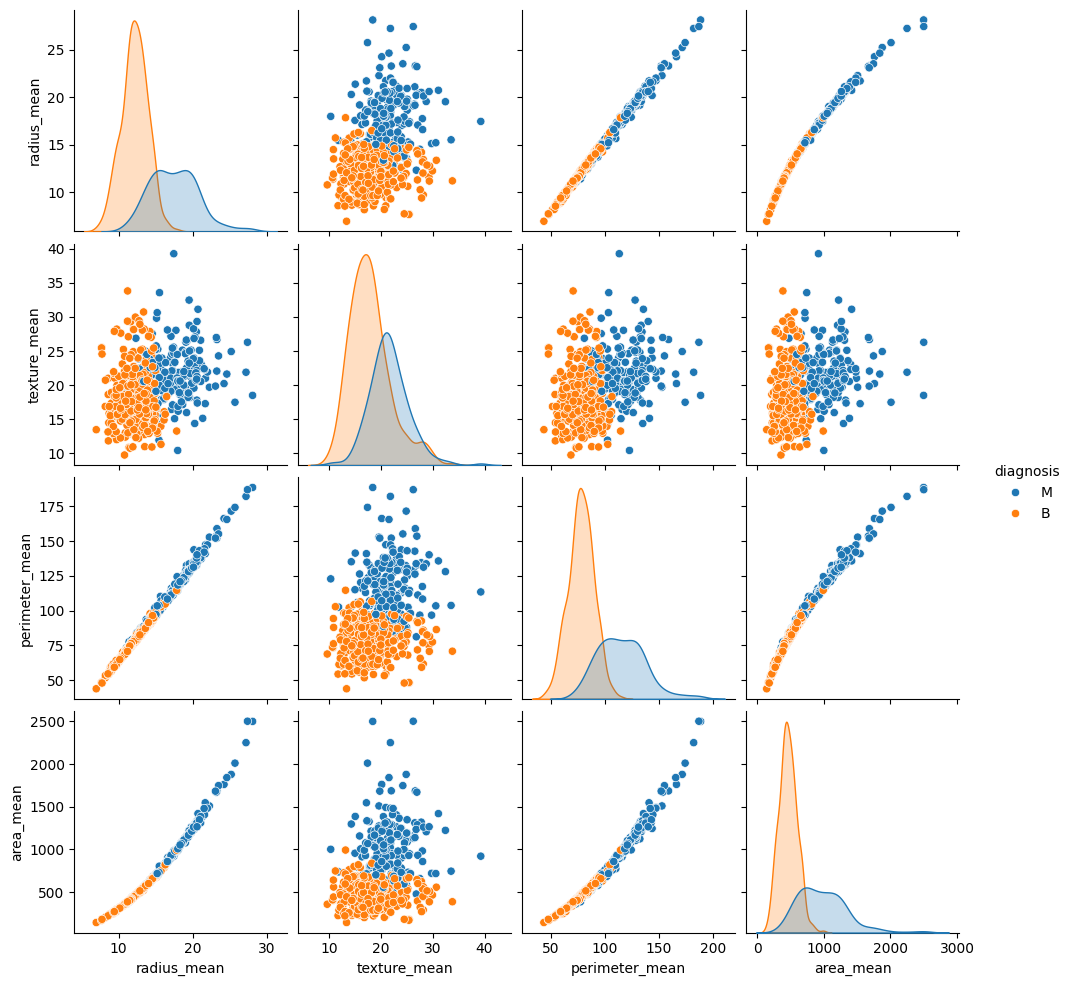

In [32]:
# Plot pairplot untuk beberapa fitur

sns.pairplot(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis')
plt.show()
# Grafik ini akan menampilkan hubungan antara variable


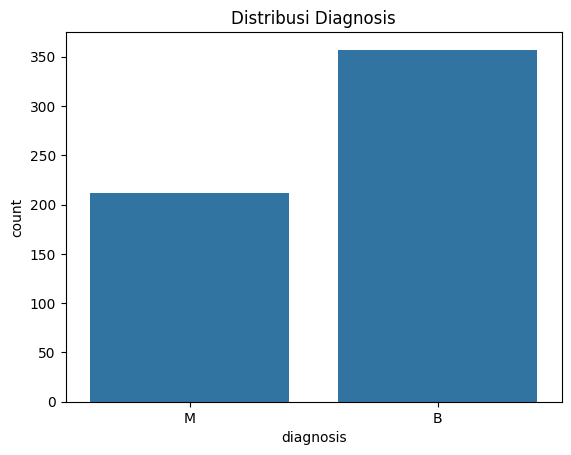

In [33]:
# Plot distribusi diagnosis
sns.countplot(data=df, x='diagnosis')
plt.title("Distribusi Diagnosis")
plt.show()

# Bar chart untuk Melihat perbandingan M dan B

In [34]:
# Machine Learning Preparation

X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#membagi dataset menjadi dua bagian, yaitu train data dan test data, sehingga model dapat dilatih pada sebagian data dan diuji pada data lain untuk menilai akurasinya

X_train shape: (455, 9)
X_test shape: (114, 9)


Model accuracy score with criterion entropy: 0.9123
Training set score: 0.9363
Test set score: 0.9123


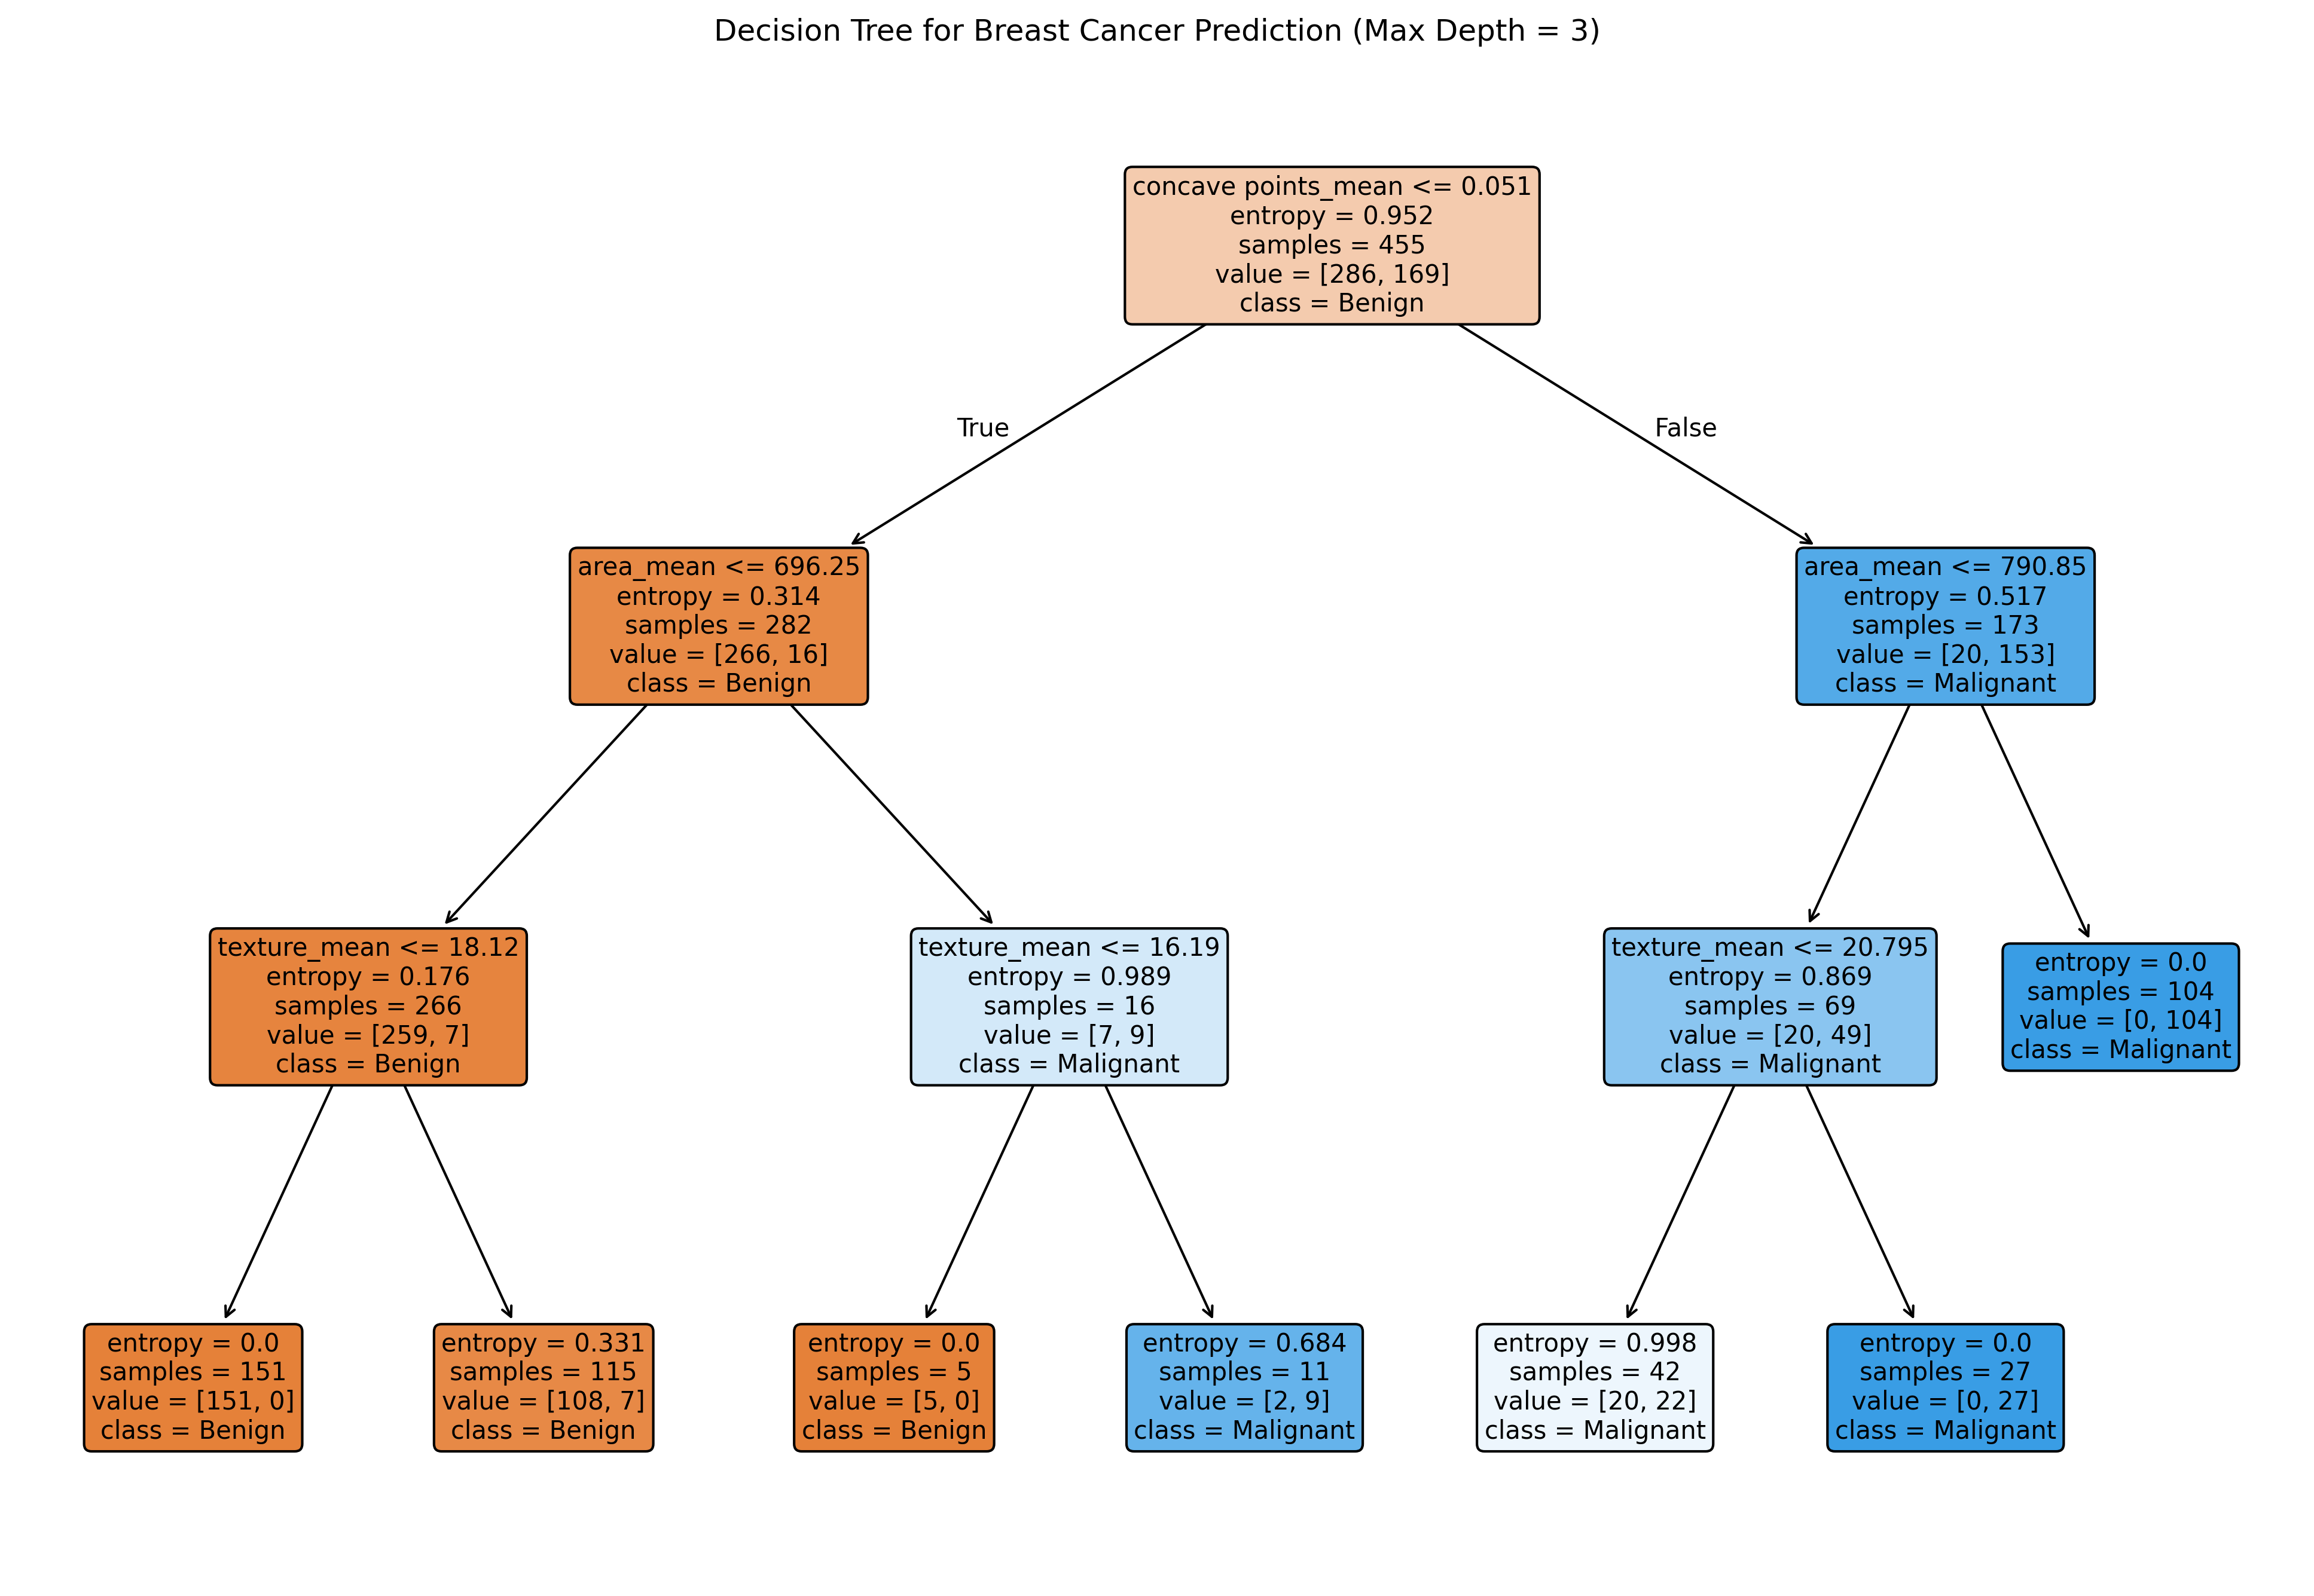

In [35]:
# Decision Tree
# Criterion Entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))
print("Training set score: {0:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(X_test, y_test)))

plt.figure(figsize=(13, 9), dpi=300)
tree.plot_tree(clf_en,
               feature_names=X_train.columns,
               class_names=['Benign', 'Malignant'],
               filled=True,
               rounded=True,
               fontsize=10,
               max_depth=3)

plt.title("Decision Tree for Breast Cancer Prediction (Max Depth = 3)")
plt.tight_layout()
plt.show()

# Membuat sebuah decision tree menggunakan metode entropy, dengan kedalaman maksimum 3 dan random_state=0 untuk memastikan struktur pohon yang sama saat kode dijalankan ulang.
# Menggunakan model yang sudah dilatih untuk membuat prediksi pada set data pengujian.
# Menghitung akurasi model untuk mengevaluasi kinerjanya.
# Membuat dan menampilkan visualisasi decision tree yang dibangun berdasarkan entropy.

Model accuracy score with criterion gini: 0.9561
Training set score: 0.9560
Test set score: 0.9561


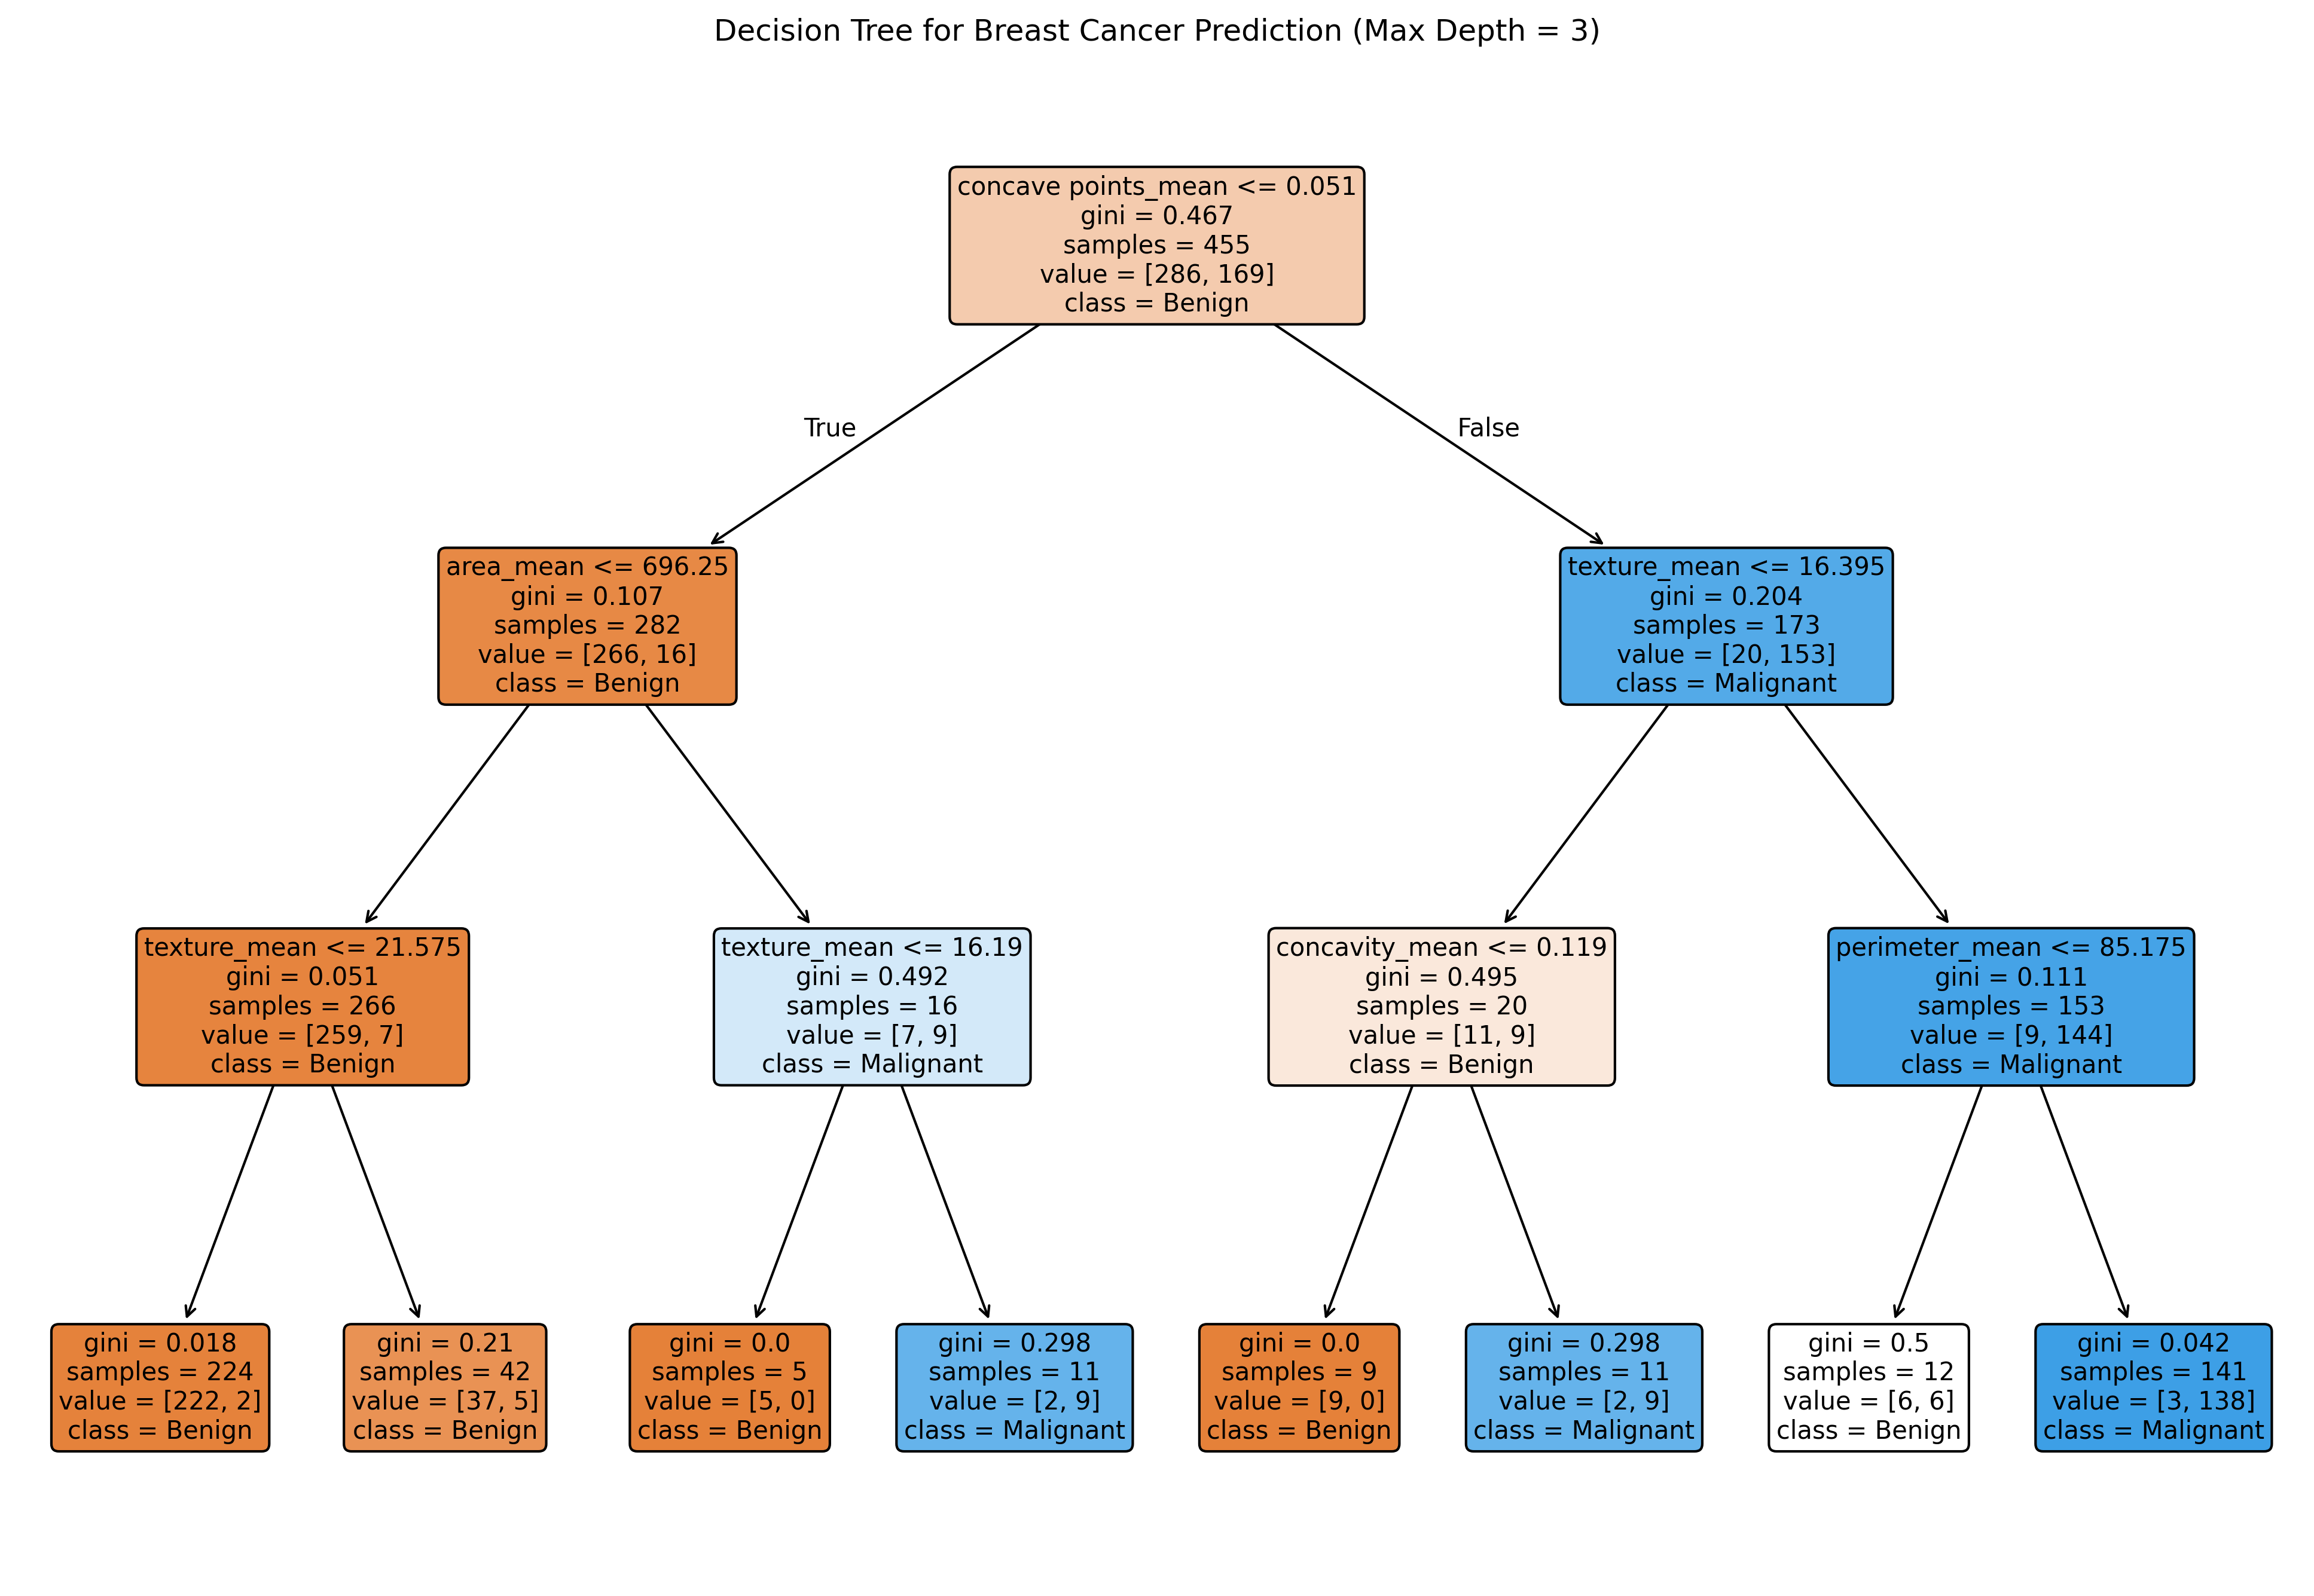

In [36]:
## Criterion Gini Index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print("Model accuracy score with criterion gini: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))
print("Training set score: {0:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(X_test, y_test)))

plt.figure(figsize=(13, 9), dpi=300)
tree.plot_tree(clf_gini,
               feature_names=X_train.columns,
               class_names=['Benign', 'Malignant'],
               filled=True,
               rounded=True,
               fontsize=10,
               max_depth=3)

plt.title("Decision Tree for Breast Cancer Prediction (Max Depth = 3)")
plt.tight_layout()
plt.show()


# Membuat sebuah decision tree menggunakan metode gini, dengan kedalaman maksimum 3 dan random_state=0 untuk memastikan struktur pohon yang sama saat kode dijalankan ulang.
# Menggunakan model yang sudah dilatih untuk membuat prediksi pada set data pengujian.
# Menghitung akurasi model untuk mengevaluasi kinerjanya.
# Membuat dan menampilkan visualisasi decision tree yang dibangun berdasarkan gini.

In [37]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

# Menghasilkan laporan klasifikasi rinci untuk model berbasis entropy dan gini.

Classification Report Entropy
              precision    recall  f1-score   support

           B       0.97      0.89      0.93        71
           M       0.84      0.95      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Classification Report gini
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [38]:
## Naive Bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

nb_y_pred = nb_classifier.predict(X_test)

print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))
print("Classification Report")
print(classification_report(y_test, nb_y_pred, target_names=['Benign', 'Malignant']))

# Membuat classifier Naive Bayes dengan distribusi Gaussian.
# Menggunakan model untuk memprediksi data pengujian.
# Menghitung akurasi dengan membandingkan nilai prediksi dan nilai aktual.
# Menghasilkan laporan klasifikasi rinci yang mencakup metrik seperti presisi, recall, F1-score, dan dukungan untuk setiap kelas.

Model accuracy score with Naive Bayes: 0.9474
Classification Report
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96        71
   Malignant       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [39]:
# KNN
from sklearn.preprocessing import StandardScaler
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengganti n_neighbors sesuai kebutuhan
knn.fit(X_train, y_train)

# Prediksi dengan model KNN
y_pred = knn.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi KNN: {accuracy:.2f}")

# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

#Kode ini menormalkan fitur menggunakan StandardScaler, yang penting untuk KNN karena model ini bergantung pada perhitungan jarak antar data. Setelah itu, model KNN dilatih dengan 5 tetangga terdekat.
# Kode ini memprediksi kelas pada data pengujian dan menghitung akurasinya. Hasil akurasi dan laporan klasifikasi ditampilkan untuk menilai efektivitas model dalam mengidentifikasi tumor jinak dan ganas.

Akurasi KNN: 0.96
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
# Conclusion
# PALING AKURAT MENGUNAKAN KNN DAN DECISION THREE.